# Rodrigo Mendoza
# Practica Word2Vec

In [2]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from gensim.models import KeyedVectors

In [4]:
from pathlib import Path
base = Path.cwd().parent
model = KeyedVectors.load_word2vec_format(base / 'GNvectors.bin', binary=True)

## Caracteristicas del Dataset GNVectors de Google
## 1) El dataset con el fue entrenada esta red tenia 1 billon de palabras
## 2) El vocabularion fue de 692 mil palabras unicas
## 3) Cada palabra es representada en 300 dimensiones (tamanio de la capa oculta)

In [5]:
def pp(obj):
    print(pd.DataFrame(obj))

pp(model['table'])

            0
0   -0.144531
1   -0.026489
2    0.117676
3    0.213867
4   -0.042236
..        ...
295 -0.076660
296  0.069824
297 -0.095215
298 -0.098145
299 -0.012268

[300 rows x 1 columns]


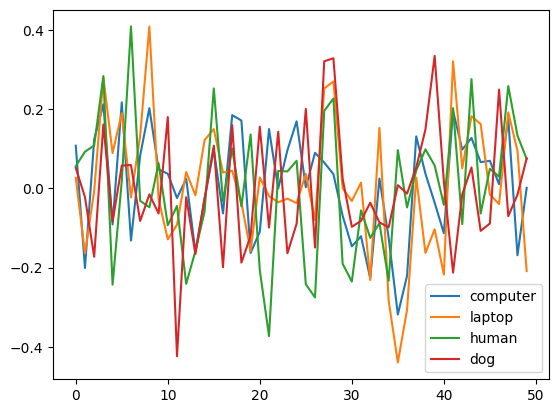

In [6]:
plt.plot(model['computer'][:50], label='computer')
plt.plot(model['laptop'][:50], label='laptop')
plt.plot(model['human'][:50], label='human')
plt.plot(model['dog'][:50], label='dog')
plt.legend()

In [7]:
pp(model.most_similar(positive=[u'cat']))

           0         1
0       cats  0.809938
1        dog  0.760946
2     kitten  0.746499
3     feline  0.732623
4     beagle  0.715058
5      puppy  0.707545
6        pup  0.693429
7        pet  0.689153
8    felines  0.675593
9  chihuahua  0.670976


In [8]:
pp(model.most_similar(positive=[u'small']))

              0         1
0         large  0.733115
1          tiny  0.718793
2  medium_sized  0.642660
3         Small  0.627047
4       smaller  0.619429
5     minuscule  0.567684
6        larger  0.544681
7     mid_sized  0.532844
8      midsized  0.519831
9       sizable  0.517508


# Compososisionalidad con operaciones lineales entre vectores

In [9]:
pp(model.most_similar(positive=['Germany', 'airline']))

                              0         1
0                     Lufthansa  0.735891
1                      airlines  0.637675
2  Deutsche_Lufthansa_AG_LHA.XE  0.621131
3                   Germanwings  0.618648
4                   Air_Polonia  0.608465
5                  Lufthansa_AG  0.600566
6                           ČSA  0.593416
7               Lufthansa_Cargo  0.592121
8         Deutsche_Lufthansa_AG  0.589482
9                     Eurowings  0.584023


In [10]:
pp(model.most_similar(positive=['Mexico', 'futbol']))

                    0         1
0              México  0.695969
1             Mexican  0.665680
2              Mexcio  0.648510
3            Mexicans  0.648058
4              fútbol  0.638499
5  Guadalajara_Chivas  0.631212
6             Mexicos  0.618846
7     Pachuca_Hidalgo  0.616235
8           Guatemala  0.602453
9    PORTALES_Eastern  0.600413


In [11]:
pp(model.most_similar(positive=['Mexico', 'Luis_Miguel']))

                     0         1
0               México  0.689470
1              Mexican  0.688434
2              Enrique  0.626953
3  Guadalajara_Jalisco  0.624086
4      Enrique_Andrade  0.623793
5          Guadalajara  0.617196
6              Torreón  0.610045
7                Jorge  0.609144
8  JAARS_CENTER_MUSEUM  0.604664
9            Alejandro  0.604240


## Solving analogies

* **man** is to **woman** as **king** is to **??**
* Relationships are encoded by word vector differences:
$$ f(\textrm{"woman"}) - f(\textrm{"man"}) = f(\textrm{"??"}) - f(\textrm{"king"})$$
* We can add the relationship encoding vector to a the vector of **king**: $$ f(\textrm{"king"}) + (f(\textrm{"woman"}) - f(\textrm{"man"})) = f(\textrm{"??"}) $$

In [12]:
pp(model.most_similar(positive=['woman', 'king'], negative=['man']))

               0         1
0          queen  0.711819
1        monarch  0.618967
2       princess  0.590243
3   crown_prince  0.549946
4         prince  0.537732
5          kings  0.523684
6  Queen_Consort  0.523595
7         queens  0.518113
8         sultan  0.509859
9       monarchy  0.508741


In [13]:
pp(model.most_similar(positive=['paris', 'germany'],
                      negative=['france']))

               0         1
0         berlin  0.484137
1         german  0.465697
2  lindsay_lohan  0.455923
3          heidi  0.448409
4    switzerland  0.444798
5        lil_kim  0.443060
6      las_vegas  0.441806
7      christina  0.439384
8           joel  0.437537
9         russia  0.437442


In [14]:
pp(model.most_similar(positive=['doctor', 'woman'],
                      negative=['man']))

                    0         1
0        gynecologist  0.709389
1               nurse  0.647729
2             doctors  0.647146
3           physician  0.643900
4        pediatrician  0.624949
5  nurse_practitioner  0.621831
6        obstetrician  0.607201
7              ob_gyn  0.598671
8             midwife  0.592706
9       dermatologist  0.573957


In [15]:
pp(model.most_similar(positive=['pain', 'wife'],
                      negative=['love']))

                             0         1
0                   discomfort  0.452449
1      agonizing_stomach_pains  0.450384
2  excruciating_abdominal_pain  0.449112
3            excruciating_pain  0.442992
4           epidural_injection  0.428647
5             Demjanjuk_moaned  0.426392
6                     backache  0.425962
7               ruptured_bowel  0.425755
8       compartmental_syndrome  0.424486
9                 chronic_pain  0.424068


In [17]:
target_words = [line.strip().lower() for line in open(base / '4000-most-common-english-words-csv.csv')]
words = [word for word in target_words if word in model]
target_matrix = np.array([model[word] for word in words])

from sklearn.manifold import TSNE

reduce_matrix = TSNE(n_components=2).fit_transform(target_matrix)

# Costelacion de palabras con Word2Vec

In [18]:
# Sacar costelacion word2vec
max_x , max_y = np.max(reduce_matrix, axis=0)
min_x , min_y = np.min(reduce_matrix, axis=0)


print(f"max_x: {max_x}, max_y: {max_y}")
print(f"min_x: {min_x}, min_y: {min_y}")

max_x: 66.7701187133789, max_y: 64.3212890625
min_x: -66.751953125, min_y: -66.12045288085938


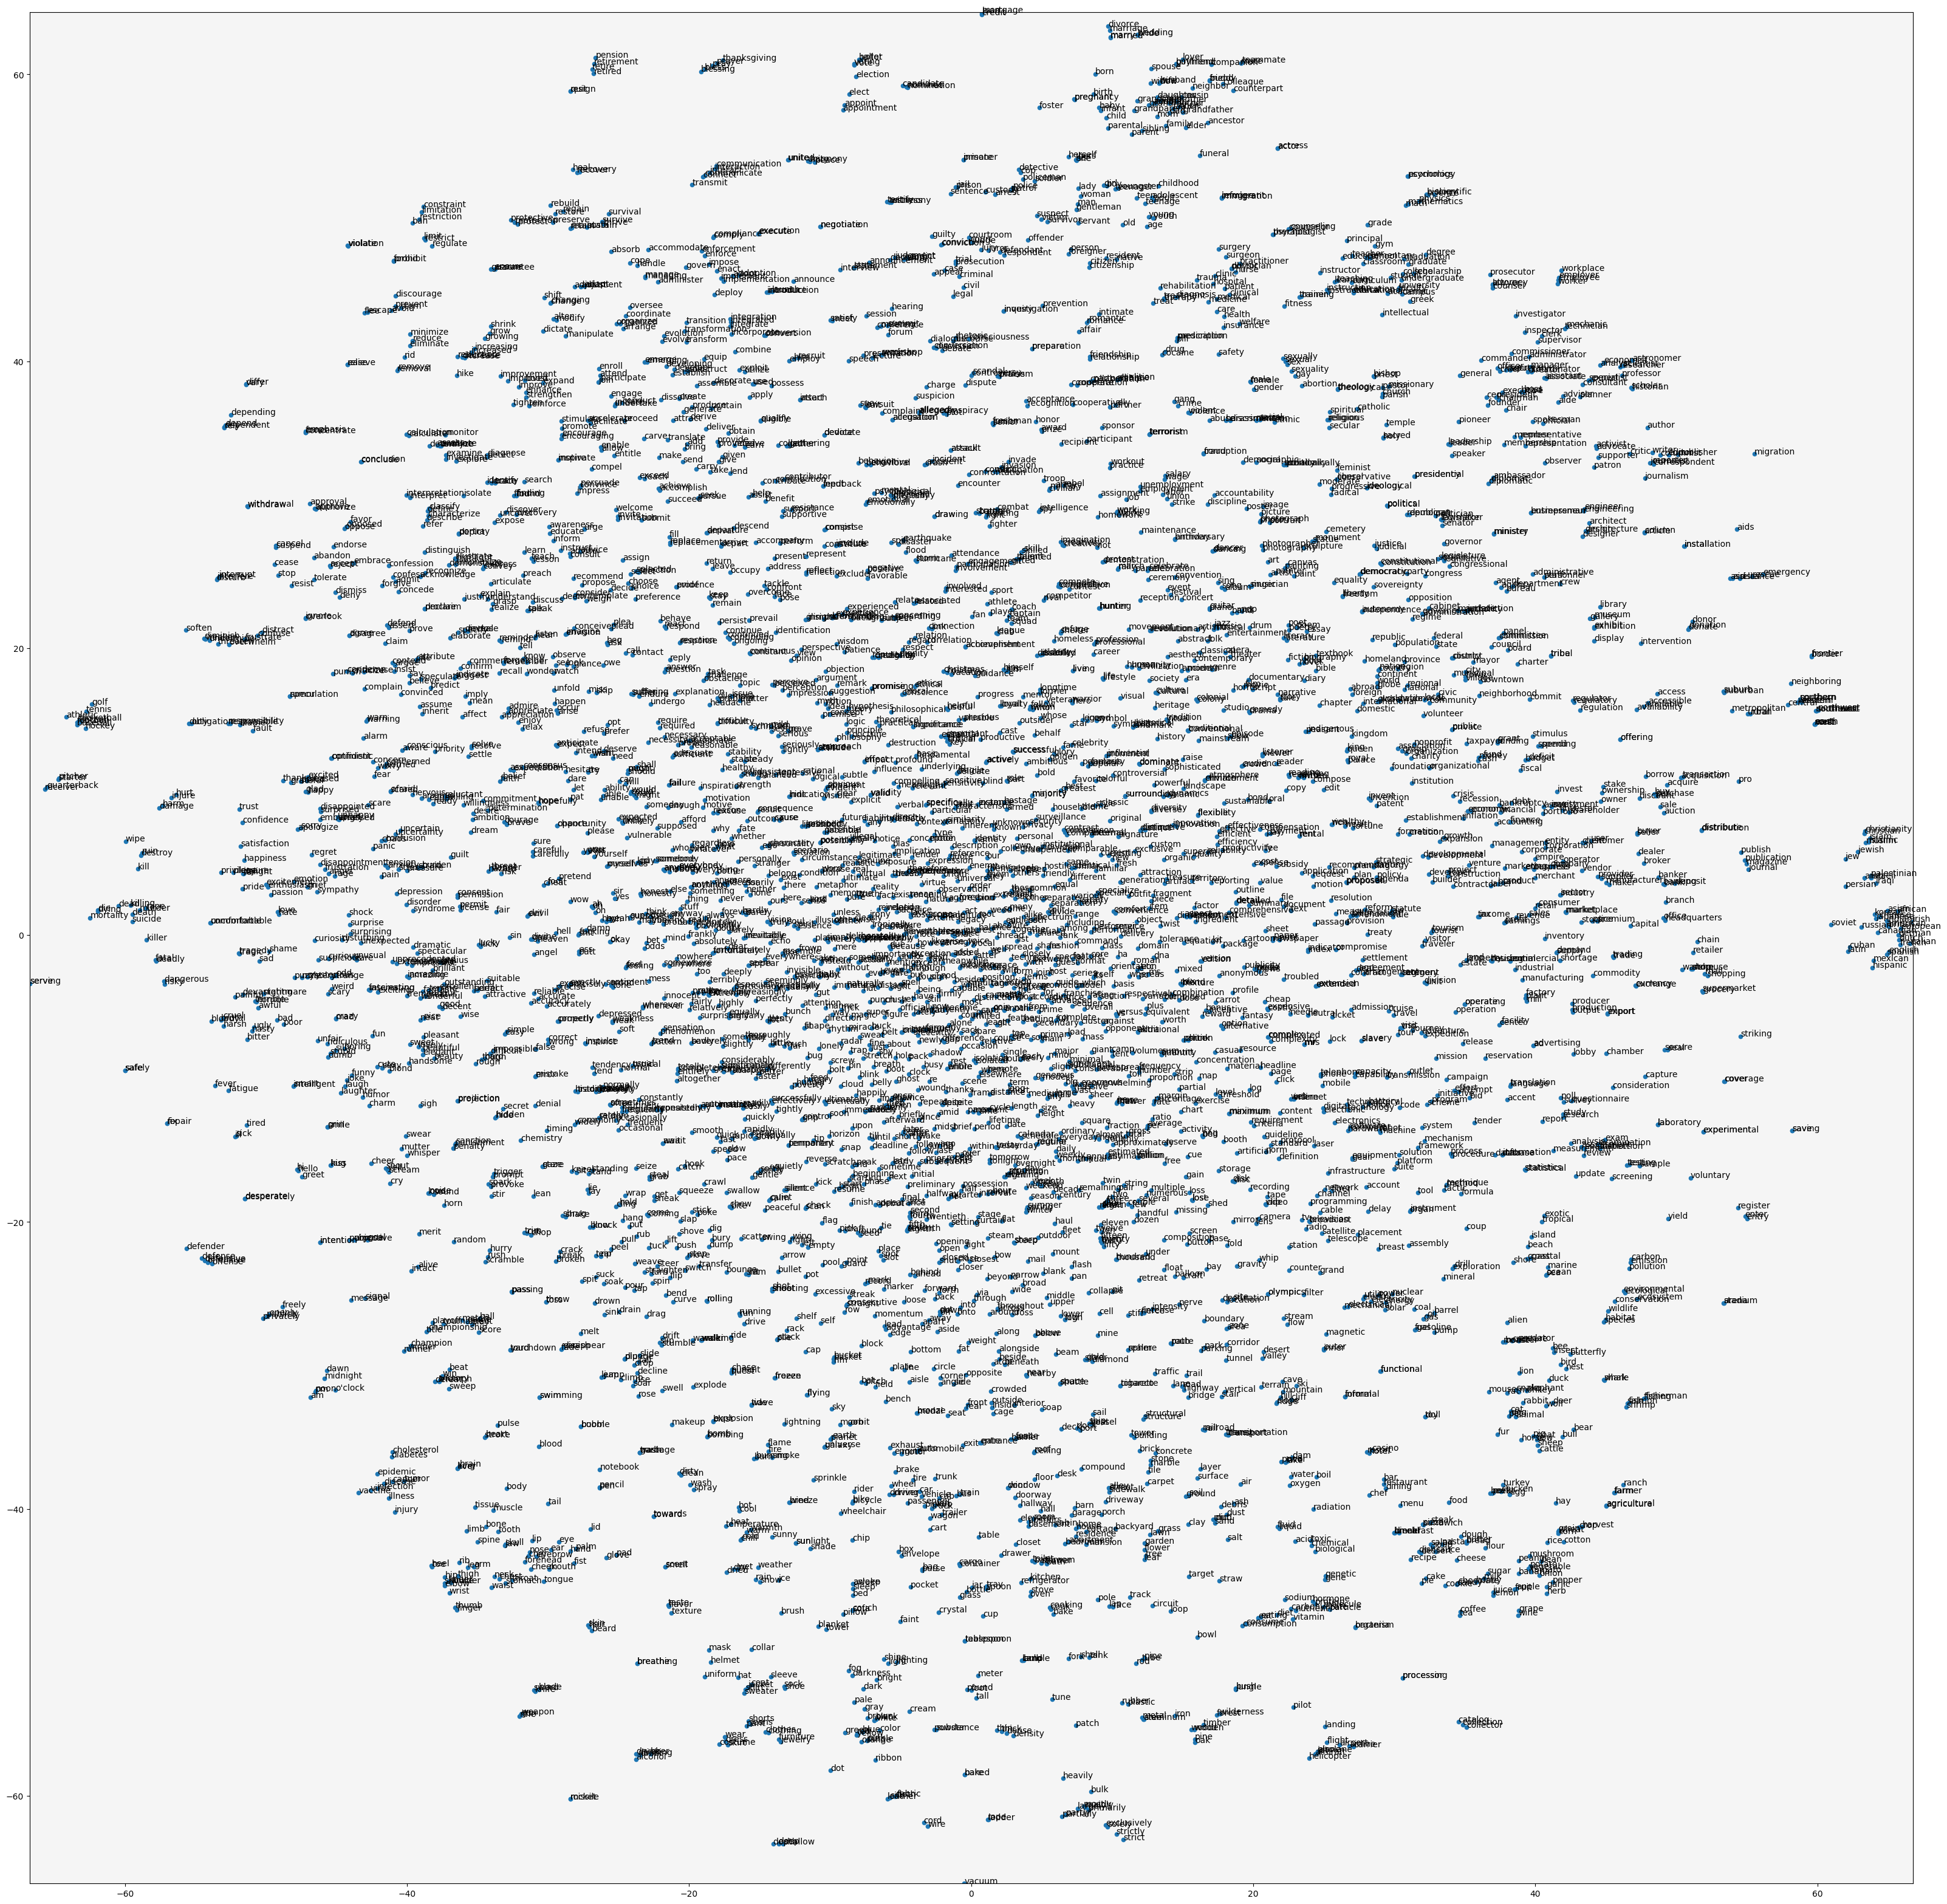

In [19]:
from matplotlib import patheffects
from nltk.corpus import stopwords

x, y = reduce_matrix[:, 0], reduce_matrix[:, 1]

plt.figure(figsize=(40, 40), dpi=100)
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.scatter(reduce_matrix[:, 0], reduce_matrix[:, 1], 20)

for i, word in enumerate(words[:]):
  x = reduce_matrix[i, 0]
  y = reduce_matrix[i, 1]
  plt.annotate(word,(x, y))

plt.gca().set_facecolor('whitesmoke')
plt.savefig('word_constellation.png', bbox_inches='tight')
plt.show()


In [20]:
from sklearn.decomposition import PCA

def plot_data(orig_data, labels):
    pca = PCA(n_components=2)
    data = pca.fit_transform(orig_data)
    plt.figure(figsize=(7, 5), dpi=100)
    plt.plot(data[:,0], data[:,1], '.')
    for i in range(len(data)):
        plt.annotate(labels[i], xy = data[i])
    for i in range(int(len(data)/2)):
        plt.annotate("",
                xy=data[i],
                xytext=data[i+int(len(data)/2)],
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3")
                )

In [21]:
def analogy(worda, wordb, wordc):
    result = model.most_similar(negative=[worda],
                                positive=[wordb, wordc])
    return result[0][0]
countries = ['USA', 'Colombia', 'Brazil', 'Venezuela', 'France', 'Spain', 'Egypt', 'China']
presidents = [analogy('Mexico', 'tacos', country) for country in countries]
pp(zip(countries,presidents))

           0                  1
0        USA         sandwiches
1   Colombia             arepas
2     Brazil          churrasco
3  Venezuela             arepas
4     France          baguettes
5      Spain             paella
6      Egypt            falafel
7      China  steamed_dumplings


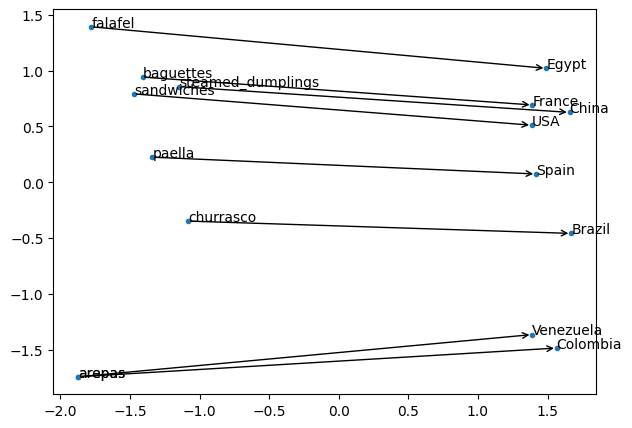

In [22]:
labels = countries + presidents
data = [model[w] for w in labels]
plot_data(data, labels)

# Comentario personal
Los clusters que se crean con Word2Vec tienen una mayor correlacion que con DOR y TCOR, el hecho de darle un valor como vector a cada palabra, haciendo posible hacer operaciones entre si, ayuda bastante en encontrar palabras similares.

En un cluster pude apreciar que alrededor de la palabra injury hay partes del cuerpo humano (arm, finger, rib, leg, etc.)

En otro cluster cerca de la palabra drink tiene palabras asociadas al consumo de bebidas como: alcohol, drinking, beer, wine, tea y coffee.